# 1. Linear Regression

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [58]:
ndim = 4
m = tf.convert_to_tensor([2., 4., 6., 17.])
c = tf.convert_to_tensor(-10.)

def generate_batch(batch_size):
  x = tf.random.uniform((batch_size, ndim))
  y = tf.reduce_sum(x * m) + c
  return x, y

In [74]:
m_pred = tf.random.uniform((ndim,))
c_pred = tf.random.uniform(())

batch_size = 32
num_iterations = 7000
learning_rate = 1e-2

In [56]:
loss_log = []

for i in range(num_iterations):
  if i % 500 == 0:
    print("Iteration", i)

  with tf.GradientTape() as tape:
    tape.watch([m_pred, c_pred])
    x, y = generate_batch(batch_size=32)
    y_pred = tf.reduce_sum(x * m_pred) + c_pred
    diffs = y - y_pred
    mse = 1/2 * tf.reduce_mean(diffs ** 2)
  
    dloss_dm, dloss_dc = tape.gradient(mse, [m_pred, c_pred])
    m_pred -= learning_rate * dloss_dm
    c_pred -= learning_rate * dloss_dc
    loss_log.append(mse)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500


In [75]:
loss_log = []

for i in range(num_iterations):
  x, y = generate_batch(batch_size=32)
  y_pred = tf.reduce_sum(x * m_pred) + c_pred
  diffs = y - y_pred
  mse = 1/2 * tf.reduce_mean(diffs ** 2)
  dloss_dm = -tf.reduce_mean(x * diffs, axis=0)
  dloss_dc = -tf.reduce_mean(diffs)
  m_pred -= learning_rate * dloss_dm
  c_pred -= learning_rate * dloss_dc
  loss_log.append(mse)

In [76]:
m_pred, c_pred

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1.6979747,  3.664819 ,  5.7065372, 16.66851  ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.161826>)

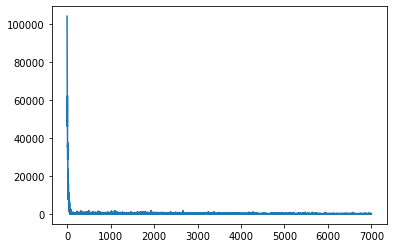

In [68]:
plt.plot(loss_log)